# Idéer til R&D endogen vækst modeller med et dynamisk element 

In [213]:
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)

# mikro problemet 
Optimal arbejdsfordeling

I hver periode, t, skal den enkelte repræsentative forbruger vælge hvor meget han vil arbejde med produktion og arbejde med forskning. Produktion bruges til forbrug i periode t og kapitalopsparing som bidrag til fremtidig produktion. Forskning øger produktiviten i fremtidige perioder .

In [215]:
#valgmuligheder:
# andelen af mulig arbejdstid som bruges på forskning:
sr = sm.symbols('s_Rt')
# I starten antages kapitalopspsparingsraten at være konstant
sk = sm.symbols('s_Kt')

In [217]:
# Ud fra de valg nogle udfald
# Først defineres variable
l = sm.symbols('L_{t}')
ly = sm.symbols('L_{Yt}')
la = sm.symbols('L_{At}')
alpha = sm.symbols('alpha')
k =sm.symbols('K_{t}')
k1 = sm.symbols('K_{t+1}')
y = sm.symbols('Y_{t}')
c = sm.symbols('C')
ct = sm.symbols('C_{t}')
a = sm.symbols('A_{t}')
a1 = sm.symbols('A_{t+1}')

#Greek:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
alpha = sm.symbols('alpha')
phi = sm.symbols('phi')
delta = sm.symbols('delta')

t = sm.symbols('t')

# Functions:
uc = sm.Function('u')(ct) 
u = sm.Function('U')(c)

Nyttefunktion:

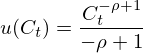

In [219]:
sm.Eq(uc,ct**(1-rho)/(1-rho))

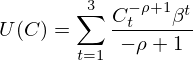

In [221]:
sm.Eq(u,sm.Sum(beta**t*ct**(1-rho)/(1-rho),(t,1,3)))

Betingelser i produktion:

In [6]:
sm.Eq(c,sk*y)

In [7]:
sm.Eq(y,a*k**alpha*(l*(1-sr))**(1-alpha))

Tidshorisonts betingelser

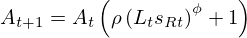

In [8]:
sm.Eq(a1,a*(1+rho*(l*sr)**phi))

In [9]:
sm.Eq(k1,sk*y-delta*k)

In [419]:
def utility(c):
    return c**(1-rho)/(1-rho)

def total_utility(c,beta):
    t_u = 0
    for i,ct in enumerate(c):
        t_u += beta**i*utility(ct)
    return t_u

def prod(k,l):
    return k**alpha*l**(1-alpha)

In [420]:
def tot_ut_sk(sk,t,beta, vector=False):
    for i in range(t):
        y[i] = prod(k[i],l)
        c[i]=(1-sk)*y[i]
        if i+1<t:
            k[i+1]=sk*y[i]-delta*k[i]
    if vector==False:
        return total_utility(c,beta)
    elif vector==True:
        return total_utility(c,beta), y, c, k

In [421]:
rho = 0.5
alpha = 0.3
delta = 0.05

In [424]:
t = 5
c = np.empty(t)
k = np.empty(t)
y = np.empty(t)
k[0] = 25
l = 100
beta = 0.9

In [425]:
obj = lambda sk: -tot_ut_sk(sk,t,beta)
sk0 = [0.3]
res = optimize.minimize(obj, sk0, method='Nelder-Mead')
print(f'Optimal sk = {res.x[0]:.4f}, with total utility = {-res.fun:.4f}')

Optimal sk = 0.2227, with total utility = 53.9390


In [278]:
sk_optimal = np.empty(50)
k0s = np.linspace(1,200,50)

for i, k0 in enumerate(k0s):
    k[0]=k0
    obj = lambda sk: -tot_ut_sk(sk,t,beta)
    res = optimize.minimize(obj, sk0, method='Nelder-Mead')
    sk_optimal[i] = res.x[0]
    
    

In [297]:
tot, y, c, k = tot_ut_sk(0.5,t,beta,vector=True)

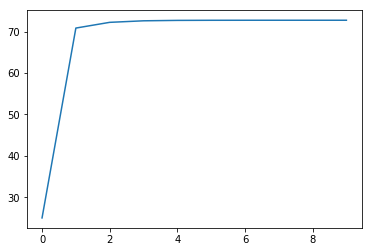

In [301]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t),k)

# I makro sammensætning

In [787]:
# Funktioner
def utility(c,rho):
    return c**(1-rho)/(1-rho)

def total_utility(c,beta,rho):
    t_u = 0
    for i,ct in enumerate(c):
        t_u += beta**i*utility(ct,rho)
    return t_u

def prod(k,l,alpha):
    return k**alpha*l**(1-alpha)

def tot_ut_sk(sk,t,beta,k0,alpha, rho, delta, detail=False):
    k_short = np.empty(t)
    c_short = np.empty(t)
    y_short = np.empty(t)
    k_short[0] = k0
    for i in range(t):
        y_short[i] = prod(k_short[i],l,alpha)
        c_short[i]=(1-sk)*y_short[i]
        if i+1<t:
            k_short[i+1]=sk*y_short[i]-delta*k_short[i] 
    if detail:
        return k_short,c_short,y_short
    else:
        return total_utility(c_short,beta,rho)

def opt_sk(t,beta, delta, alpha, rho, k0):
    obj = lambda sk: -tot_ut_sk(sk,t,beta,k0, alpha, rho, delta)
    sk0 = alpha
    res = optimize.minimize_scalar(obj, sk0, method='bounded',bounds=[0,1])
    return res.x

In [805]:
rho = 0.5
alpha = 1/3
delta = 0.05
t = 1000
k0 = 10
l = 100
beta = 0.9

In [818]:
opt_sk(t, beta,delta,alpha,rho,k0)

In [813]:
t_store = 25
c = np.empty(t_store)
k = np.empty(t_store)
k[0] = 15.4
y = np.empty(t_store)
sks = np.empty(t_store)

In [814]:
for i in range(t_store):
    k0 = k[i]
    sks[i] = opt_sk(t,beta,delta,alpha,rho,k0)
    if i+1<t_store:
        k[i+1] = sks[i]*prod(k[i],l,alpha)-delta*k[i]

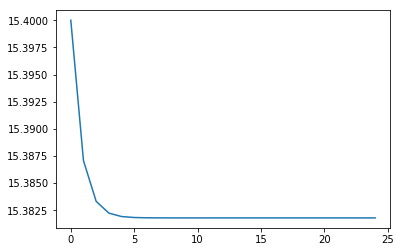

In [815]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t_store),k)

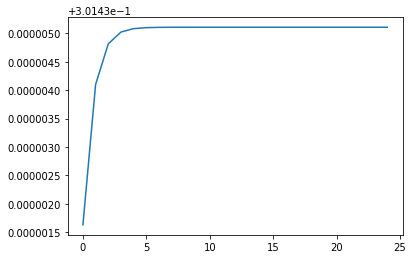

In [819]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(range(t_store),sks)